In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import dill
import sys
sys.path.append('../')
from modelfitting import train_test_split, ROC_curve, PR_curve, stable_unstable_hist, calibration_plot, unstable_error_fraction
try:
    plt.style.use('paper')
except:
    pass
%matplotlib inline

# Paths to where we store the training data and the models

In [2]:
datapath = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/MLstability/training_data/'
modelpath = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/MLstability/models/'
models = {'Ideal':'shadowtimesxgb_', 'v6':'ressummaryfeaturesxgbv6_', 'Hill':'HillSpheresxgb_', 'MEGNO':'megnoxgb_', 'AMD':'AMD_'}

# Train on Random, Test on Random

In [3]:
testing_dataset = 'random'

# Precision Recall Curve

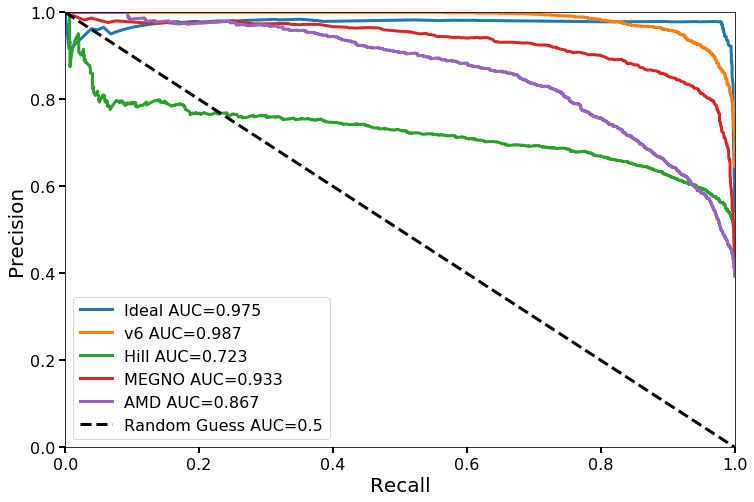

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    pr_auc, precision, recall, PRthresholds = PR_curve(testingdatafolder, model, features)
    ax.plot(recall, precision, label='{0} AUC={1:.3f}'.format(name, pr_auc))

ax.plot(np.linspace(0,1), np.linspace(1,0), 'k--', label='Random Guess AUC=0.5')
ax.legend()

# Check how the prediction fidelity varies with how long a system takes to go unstable

We can't subdivide the systems that stayed stable to 1e9 orbits, but we can take all the unstable systems and divide them into bins based on their actual instability times. We can then ask, in each of those bins, what fraction of the systems did the model mispredict, i.e., what fraction did the model say would be stable but the system was actually unstable? Shows, as expected, that it's harder to predict stability the longer the instability time is away from our short integrations of $10^4$ orbits

../modelfitting.py:99: RuntimeWarning: divide by zero encountered in true_divide
  errorbars.append(np.sqrt(1./Nerrors + 1./hist[i])*errorfracs[-1]) # see calibration plot comment
../modelfitting.py:99: RuntimeWarning: invalid value encountered in double_scalars
  errorbars.append(np.sqrt(1./Nerrors + 1./hist[i])*errorfracs[-1]) # see calibration plot comment


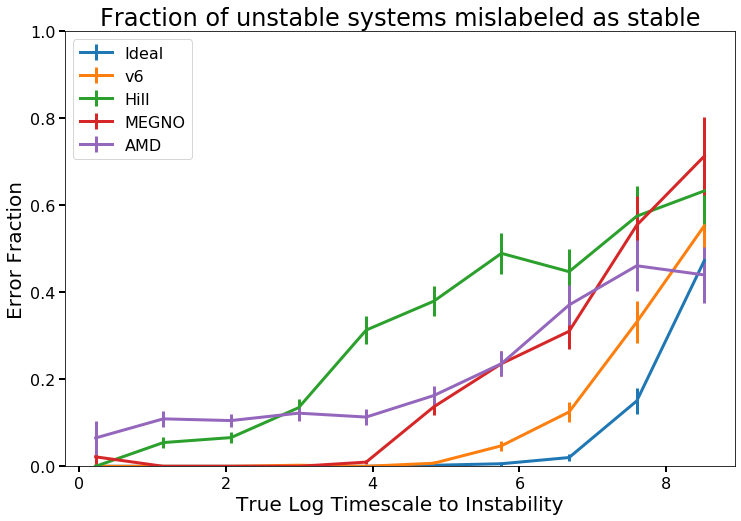

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('True Log Timescale to Instability')
ax.set_ylabel('Error Fraction')
ax.set_title('Fraction of unstable systems mislabeled as stable')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    bincenters, errorfracs, errorbars = unstable_error_fraction(testingdatafolder, model, features, bins=10)
    ax.errorbar(bincenters, errorfracs, errorbars, label='{0}'.format(name))

ax.legend()

# Train on Resonant, Test on Resonant

In [6]:
testing_dataset = 'resonant'

# Precision Recall Curve

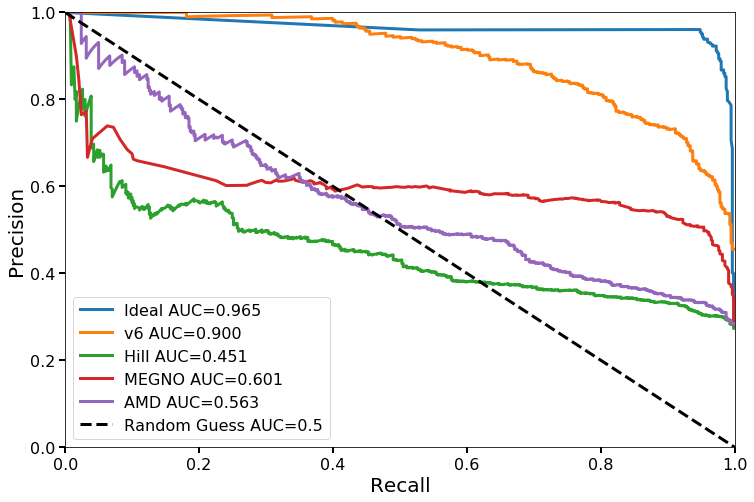

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    pr_auc, precision, recall, PRthresholds = PR_curve(testingdatafolder, model, features)
    ax.plot(recall, precision, label='{0} AUC={1:.3f}'.format(name, pr_auc))

ax.plot(np.linspace(0,1), np.linspace(1,0), 'k--', label='Random Guess AUC=0.5')
ax.legend()

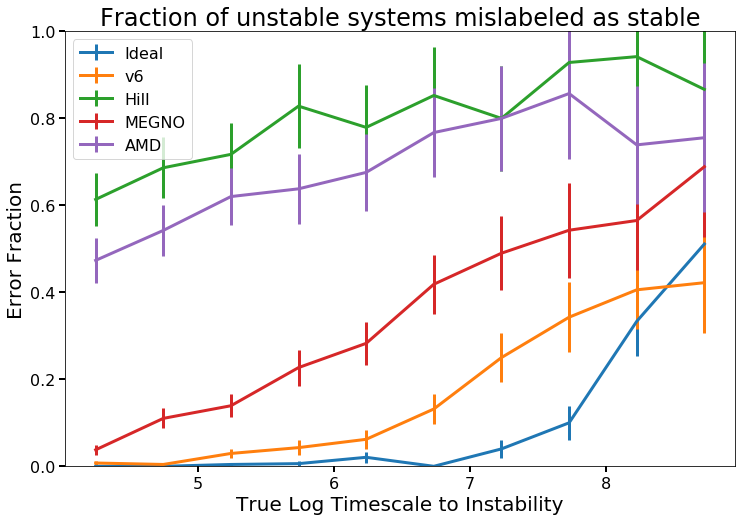

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('True Log Timescale to Instability')
ax.set_ylabel('Error Fraction')
ax.set_title('Fraction of unstable systems mislabeled as stable')

for name, filename in models.items():
    model, features, featurefolder = dill.load(open(modelpath+filename+testing_dataset+'.pkl', "rb"))
    testingdatafolder = datapath+testing_dataset+'/'+featurefolder
    bincenters, errorfracs, errorbars = unstable_error_fraction(testingdatafolder, model, features, bins=10)
    ax.errorbar(bincenters, errorfracs, errorbars, label='{0}'.format(name))

ax.legend()